In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import sklearn
from sklearn.linear_model import LogisticRegression # AS y is binary 0,1
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
data=load_breast_cancer()

In [4]:
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [5]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [7]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [8]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [9]:
ds=pd.DataFrame(data.data,columns=data.feature_names)

In [10]:
ds

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [11]:
ds['target']=pd.DataFrame(data=data.target)

In [12]:
ds

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [13]:
ds.target

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int32

In [14]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [15]:
x=ds.iloc[:,0:30]

In [16]:
x.shape

(569, 30)

In [17]:
y=ds.iloc[:,30:]

In [18]:
y.shape

(569, 1)

In [19]:
y

,target
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


In [20]:
x

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [21]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.22,random_state=4)

In [22]:
train_x.shape

(443, 30)

In [23]:
train_y.shape

(443, 1)

In [24]:
test_x.shape

(126, 30)

In [25]:
test_y.shape

(126, 1)

In [26]:
lg=LogisticRegression()

In [27]:
lg.fit(train_x,train_y)

LogisticRegression()

In [28]:
pred=lg.predict(test_x)

In [29]:
print("\n",accuracy_score(pred,test_y))
print("\n",confusion_matrix(pred,test_y))
print("\n",classification_report(pred,test_y))


 0.8968253968253969

 [[34  9]
 [ 4 79]]

               precision    recall  f1-score   support

           0       0.89      0.79      0.84        43
           1       0.90      0.95      0.92        83

    accuracy                           0.90       126
   macro avg       0.90      0.87      0.88       126
weighted avg       0.90      0.90      0.90       126



# AUC ROC CURVE

Area under the curve-Reciever operating characteristics

In [30]:
from sklearn.metrics import roc_curve

In [31]:
from sklearn.metrics import roc_auc_score

In [32]:
y_pred_prob=lg.predict_proba(test_x)[:,1]

In [33]:
y_pred_prob

array([3.42535196e-01, 9.95213485e-01, 4.41176788e-14, 5.44112880e-06,
       2.11655728e-01, 3.52638367e-02, 9.97389363e-01, 9.99678769e-01,
       3.00455635e-01, 9.94980537e-01, 1.35387291e-11, 9.58852324e-01,
       8.82286971e-01, 9.00623566e-01, 9.90539190e-01, 9.99460139e-01,
       9.98810888e-01, 7.90885612e-01, 9.99479159e-01, 9.98426101e-01,
       9.90125355e-01, 9.63919361e-01, 3.78427738e-06, 9.94236049e-01,
       9.98095854e-01, 1.81073488e-03, 9.93099970e-01, 9.99387042e-01,
       9.92608948e-01, 9.77118284e-01, 9.98610563e-01, 9.99501351e-01,
       9.47202656e-01, 3.67865463e-01, 9.93796263e-01, 8.41572107e-12,
       9.99924222e-01, 2.93345174e-01, 1.95297099e-05, 3.63601552e-02,
       7.59967493e-01, 9.94098216e-01, 3.64078427e-01, 6.44405960e-01,
       8.37713810e-01, 9.79254856e-01, 8.43778445e-03, 2.57176186e-22,
       9.95255088e-01, 8.65561316e-01, 7.48140701e-11, 4.82270289e-01,
       9.97422494e-01, 3.75538775e-01, 9.58583915e-01, 9.97085122e-01,
      

In [34]:
fpr,tpr,thresholds=roc_curve(test_y,y_pred_prob)

In [35]:
fpr #false positive rate

array([0.        , 0.        , 0.        , 0.02631579, 0.02631579,
       0.07894737, 0.07894737, 0.10526316, 0.10526316, 0.13157895,
       0.13157895, 0.15789474, 0.15789474, 0.21052632, 0.21052632,
       0.26315789, 0.26315789, 1.        ])

In [36]:
tpr #true positive rate

array([0.        , 0.01136364, 0.79545455, 0.79545455, 0.85227273,
       0.85227273, 0.875     , 0.875     , 0.90909091, 0.90909091,
       0.93181818, 0.93181818, 0.94318182, 0.94318182, 0.97727273,
       0.97727273, 1.        , 1.        ])

In [37]:
thresholds 

array([1.99992422e+00, 9.99924222e-01, 8.82286971e-01, 8.65561316e-01,
       7.65944170e-01, 7.10644785e-01, 6.44405960e-01, 6.22858918e-01,
       4.82270289e-01, 3.87757380e-01, 3.67865463e-01, 3.64078427e-01,
       3.42535196e-01, 2.93345174e-01, 2.11655728e-01, 3.63601552e-02,
       8.43778445e-03, 1.50198261e-22])

Text(0.5, 1.0, 'Logistic Regression')

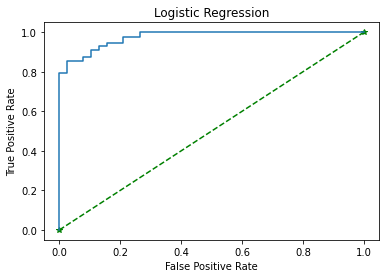

In [38]:
plt.plot([0,1],[0,1],'g--*')
plt.plot(fpr,tpr,label="Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression")

In [39]:
auc_score=roc_auc_score(test_y,lg.predict(test_x))

In [40]:
auc_score

0.896232057416268

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
dt=DecisionTreeClassifier()
dt.fit(train_x,train_y)
dt_predict=dt.predict(test_x)

dt_score=accuracy_score(test_y,dt_predict)

In [43]:
round(dt_score,2)

0.89

Text(0.5, 1.0, 'Decision Tree Classifier')

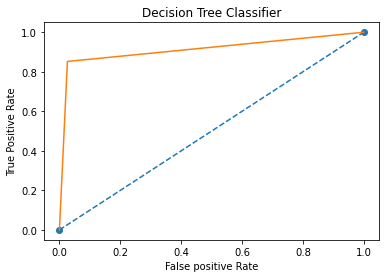

In [44]:
y_pred_prob=dt.predict_proba(test_x)[:,1] # making y_prediction_probability

fpr,tpr,thresholds=roc_curve(test_y,y_pred_prob) # this graph we are passing

# graphical representation with decision tree classifer

plt.plot([0,1],[0,1],'o--')
plt.plot(fpr,tpr,label="Decision Tree Classifier")
plt.xlabel("False positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Decision Tree Classifier")

In [45]:
auc_score=roc_auc_score(test_y,dt.predict(test_x))
print(auc_score)

0.9129784688995215


In [47]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [49]:
# instance of classifer created

gnb=GaussianNB()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
lg=LogisticRegression()
svc=SVC()

model=[gnb,dtc,knn,lg,svc]

for m in model:
    m.fit(train_x,train_y)
    m.score(train_x,train_y)
    pred_y=m.predict(test_x)
    
    print("\n Score :",m," ",m.score(train_x,train_y))
    print("Accuracy_score",accuracy_score(pred_y,test_y),"\n")
    print("\n",confusion_matrix(pred_y,test_y),"\n")
    print("\n",classification_report(pred_y,test_y),"\n \n")


 Score : GaussianNB()   0.945823927765237
Accuracy_score 0.9206349206349206 


 [[36  8]
 [ 2 80]] 


               precision    recall  f1-score   support

           0       0.95      0.82      0.88        44
           1       0.91      0.98      0.94        82

    accuracy                           0.92       126
   macro avg       0.93      0.90      0.91       126
weighted avg       0.92      0.92      0.92       126
 
 


 Score : DecisionTreeClassifier()   1.0
Accuracy_score 0.8888888888888888 


 [[37 13]
 [ 1 75]] 


               precision    recall  f1-score   support

           0       0.97      0.74      0.84        50
           1       0.85      0.99      0.91        76

    accuracy                           0.89       126
   macro avg       0.91      0.86      0.88       126
weighted avg       0.90      0.89      0.89       126
 
 


 Score : KNeighborsClassifier()   0.9525959367945824
Accuracy_score 0.8888888888888888 


 [[33  9]
 [ 5 79]] 


               pre